# ETHICAL FASHION
## De la fast fashion à la mode éthique 
M2 - PROJECT IA

IA SCHOOL PARIS

**Membres du groupe**

AHOUDJI Aunice

ABDENOURI Nabil

BOUNDJI Christ

SANOGO Aboubacar Sidik 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data=pd.read_csv("/Finaldataset.csv")
data.sample(5)

,ResponseId,Informed consent,Age,Gender,Continent of residence,Understanding of sustainability,Concerned about wasting resources,Socially responsible person,Prefer sustainability to convenience,Willingness to make the world a better place,Clothing shopping frequencies,Factors that influence my shopping decisions,Needs and desires,Understanding of ethical fashion,Own sustainable clothing,Well informed on sustainable clothing,Impact of sustainable clothing on the world,Ability to afford sustainable clothing,Intention to buy sustainable clothing within the next 12 months
1427,R_Ubfaboyk7GWsnbb,Yes,22-39,Female,North America,A practice that allows responsible use of reso...,TRUE,Neutral,Mostly true,Important,Monthly,Do I need this?,Better made clothing,Quality pieces made in an ethical way,Maybe/Not sure,Strongly disagree,TRUE,Neutral,Mostly true
815,R_37S6JFypt9QjSpz,Yes,22-39,Female,North America,Made of or uses materials that are renewable/r...,Mostly true,Mostly true,Mostly true,Important,Monthly,Can I buy it online and be relatively certain ...,"More high quality, not ""fast fashion"" clothes....",Made from renewable and ethically sourced mate...,No,Strongly disagree,TRUE,Strongly agree,Not true
207,R_10IZVjBcyJOJeId,Yes,22-39,Female,North America,I would describe it as meaning being kept supp...,Mostly true,Mostly true,TRUE,Very important,Monthly,Price and quality,"Something that is comfortable, going to last a...",Sustainable clothing is clothing that is quali...,Yes,Disagree,TRUE,Agree,Mostly true
1873,R_10ZzxAtjegGv2st,Yes,22-39,Female,North America,participating and living in a way that promote...,TRUE,TRUE,TRUE,Very important,Monthly,"Fit, how I feel wearing it",Clothes that were better made and fit better,"Clothing made thoughtfully, with each part of ...",Yes,Agree,Neutral,Disagree,TRUE
596,R_1CyHxatHawuFw9m,Yes,22-39,Female,Europe,Globally I think it's not just thinking about ...,Mostly true,Mostly true,Mostly not true,Important,Monthly,do I like this particular piece of clothing or...,clothing that is made of natural materials and...,It is clothing that's made of nature-friendly ...,Maybe/Not sure,Disagree,TRUE,Agree,TRUE


In [ ]:
data.drop(data[data["Informed consent"]=="No"].index, inplace=True)

# Analyse de la base de donnée

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 0 to 2813
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   ResponseId                                                       2799 non-null   object
 1   Informed consent                                                 2799 non-null   object
 2   Age                                                              2749 non-null   object
 3   Gender                                                           2758 non-null   object
 4   Continent of residence                                           2753 non-null   object
 5   Understanding of sustainability                                  2195 non-null   object
 6   Concerned about wasting resources                                2180 non-null   object
 7   Socially responsible person                        

In [ ]:
(data.duplicated().sum()/2799)*100

0.0

In [ ]:
data.dropna(thresh=10, inplace=True) #delete rows with less than 10 non-null values

In [ ]:
((data.isna().sum()/2799)*100).round(2)

ResponseId                                                         0.00
Informed consent                                                   0.00
Age                                                                0.29
Gender                                                             0.00
Continent of residence                                             0.07
Understanding of sustainability                                    3.07
Concerned about wasting resources                                  0.29
Socially responsible person                                        0.21
Prefer sustainability to convenience                               0.18
Willingness to make the world a better place                       0.29
Clothing shopping frequencies                                      2.47
Factors that influence my shopping decisions                       6.61
Needs and desires                                                  6.79
Understanding of ethical fashion                                

In [ ]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Continent of residence'].fillna(data['Continent of residence'].mode()[0], inplace=True)
data['Concerned about wasting resources'].fillna(data['Concerned about wasting resources'].mode()[0], inplace=True)
data['Socially responsible person'].fillna(data['Socially responsible person'].mode()[0], inplace=True)
data['Prefer sustainability to convenience'].fillna(data['Prefer sustainability to convenience'].mode()[0], inplace=True)
data['Willingness to make the world a better place'].fillna(data['Willingness to make the world a better place'].mode()[0], inplace=True)
data['Clothing shopping frequencies'].fillna(data['Clothing shopping frequencies'].mode()[0], inplace=True)
data['Own sustainable clothing'].fillna(data['Own sustainable clothing'].mode()[0], inplace=True)
data['Well informed on sustainable clothing'].fillna(data['Well informed on sustainable clothing'].mode()[0], inplace=True)
data['Impact of sustainable clothing on the world'].fillna(data['Impact of sustainable clothing on the world'].mode()[0], inplace=True)
data['Ability to afford sustainable clothing'].fillna(data['Ability to afford sustainable clothing'].mode()[0], inplace=True)
data['Intention to buy sustainable clothing within the next 12 months'].fillna(data['Intention to buy sustainable clothing within the next 12 months'].mode()[0], inplace=True)
((data.isna().sum()/2814)*100).round(2)

ResponseId                                                         0.00
Informed consent                                                   0.00
Age                                                                0.00
Gender                                                             0.00
Continent of residence                                             0.00
Understanding of sustainability                                    3.06
Concerned about wasting resources                                  0.00
Socially responsible person                                        0.00
Prefer sustainability to convenience                               0.00
Willingness to make the world a better place                       0.00
Clothing shopping frequencies                                      0.00
Factors that influence my shopping decisions                       6.57
Needs and desires                                                  6.75
Understanding of ethical fashion                                

# Data Encoding

In [ ]:
encode = LabelEncoder()

In [ ]:
custom_mapping = {'Mostly not true':0, 'Not true':1, 'Neutral':2, 'TRUE':3, 'Mostly true':4}
data['Intention to buy sustainable clothing within the next 12 months'] = encode.fit_transform(data['Intention to buy sustainable clothing within the next 12 months'].map(custom_mapping))

In [ ]:
data["Intention to buy sustainable clothing within the next 12 months"]=np.where(data["Intention to buy sustainable clothing within the next 12 months"]>=3,1,0)
#1-for people that will buy , 0- people that will not

In [ ]:
datanum=data.drop(columns=["ResponseId","Informed consent","Understanding of sustainability","Factors that influence my shopping decisions","Needs and desires","Understanding of ethical fashion"])

In [ ]:
custom_mapping = {'Under 22':0, '22-39':1, '39-52':2, '52-70':3, '70+':4}
datanum['Age'] = encode.fit_transform(datanum['Age'].map(custom_mapping))

In [ ]:
datanum['Gender'] = encode.fit_transform(datanum['Gender'])
encode.classes_

array(['Female', 'Male', 'Other', 'Prefer not to say'], dtype=object)

In [ ]:
datanum['Continent of residence'] = encode.fit_transform(datanum['Continent of residence'])
encode.classes_

array(['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'South America'], dtype=object)

In [ ]:
custom_mapping = {'Mostly not true':0, 'Not true':1, 'Neutral':2, 'TRUE':3, 'Mostly true':4}
datanum['Concerned about wasting resources'] = encode.fit_transform(datanum['Concerned about wasting resources'].map(custom_mapping))

In [ ]:
custom_mapping = {'Mostly not true':0, 'Not true':1, 'Neutral':2, 'TRUE':3, 'Mostly true':4}
datanum['Socially responsible person'] = encode.fit_transform(datanum['Socially responsible person'].map(custom_mapping))

In [ ]:
custom_mapping = {'Mostly not true':0, 'Not true':1, 'Neutral':2, 'TRUE':3, 'Mostly true':4}
datanum['Prefer sustainability to convenience'] = encode.fit_transform(datanum['Prefer sustainability to convenience'].map(custom_mapping))

In [ ]:
custom_mapping = {'Not important':0, 'Slightly important':1, 'Neutral':2, 'Important':3, 'Very important':4}
datanum['Willingness to make the world a better place'] = encode.fit_transform(datanum['Willingness to make the world a better place'].map(custom_mapping))

In [ ]:
custom_mapping = {'I avoid it at all costs!':0, 'Yearly':1,'Every 6 months':2, 'Every 3 months':3, 'Monthly':4, 'Weekly':5, 'Everyday!':6}
datanum['Clothing shopping frequencies'] = encode.fit_transform(datanum['Clothing shopping frequencies'].map(custom_mapping))

In [ ]:
custom_mapping = {'No':0, 'Maybe/Not sure':1, 'Yes':2}
datanum['Own sustainable clothing'] = encode.fit_transform(datanum['Own sustainable clothing'].map(custom_mapping))

In [ ]:
custom_mapping = {'Strongly disagree':0, 'Disagree':1, 'Neutral':2, 'Agree':3, 'Strongly agree':4}
datanum['Well informed on sustainable clothing'] = encode.fit_transform(datanum['Well informed on sustainable clothing'].map(custom_mapping))

In [ ]:
custom_mapping = {'Mostly not true':0, 'Not true':1, 'Neutral':2, 'TRUE':3, 'Mostly true':4}
datanum['Impact of sustainable clothing on the world'] = encode.fit_transform(datanum['Impact of sustainable clothing on the world'].map(custom_mapping))

In [ ]:
custom_mapping = {'Strongly disagree':4, 'Disagree':3, 'Neutral':2, 'Agree':1, 'Strongly agree':0}
datanum['Ability to afford sustainable clothing'] = encode.fit_transform(datanum['Ability to afford sustainable clothing'].map(custom_mapping))

# Description la base de donnée

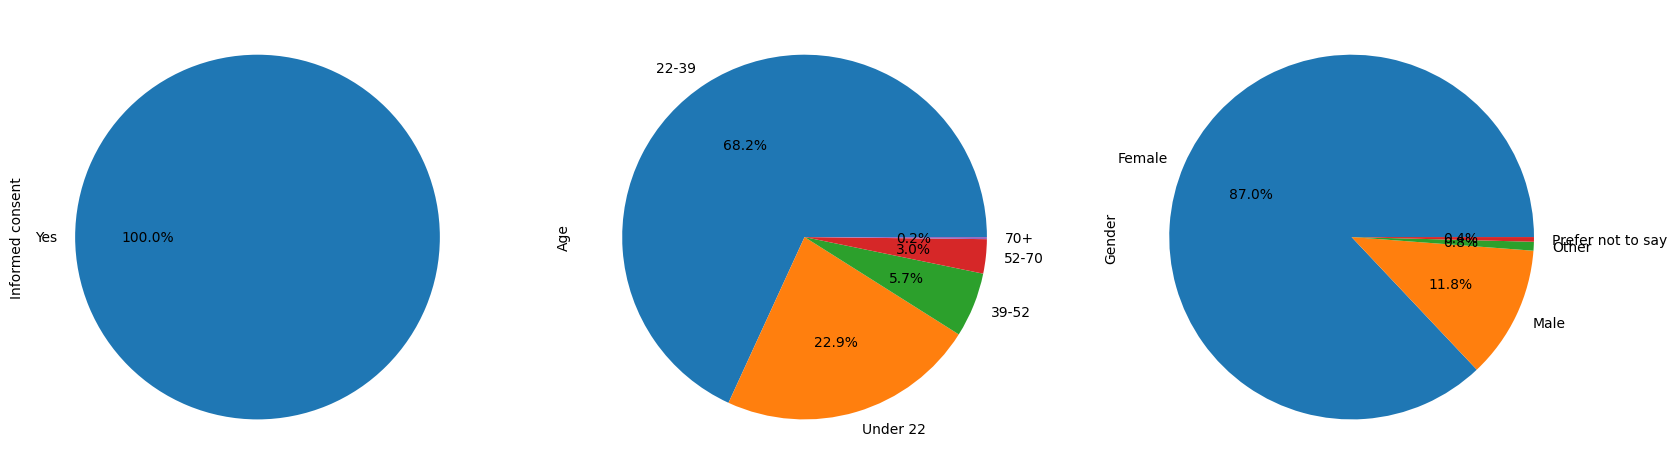

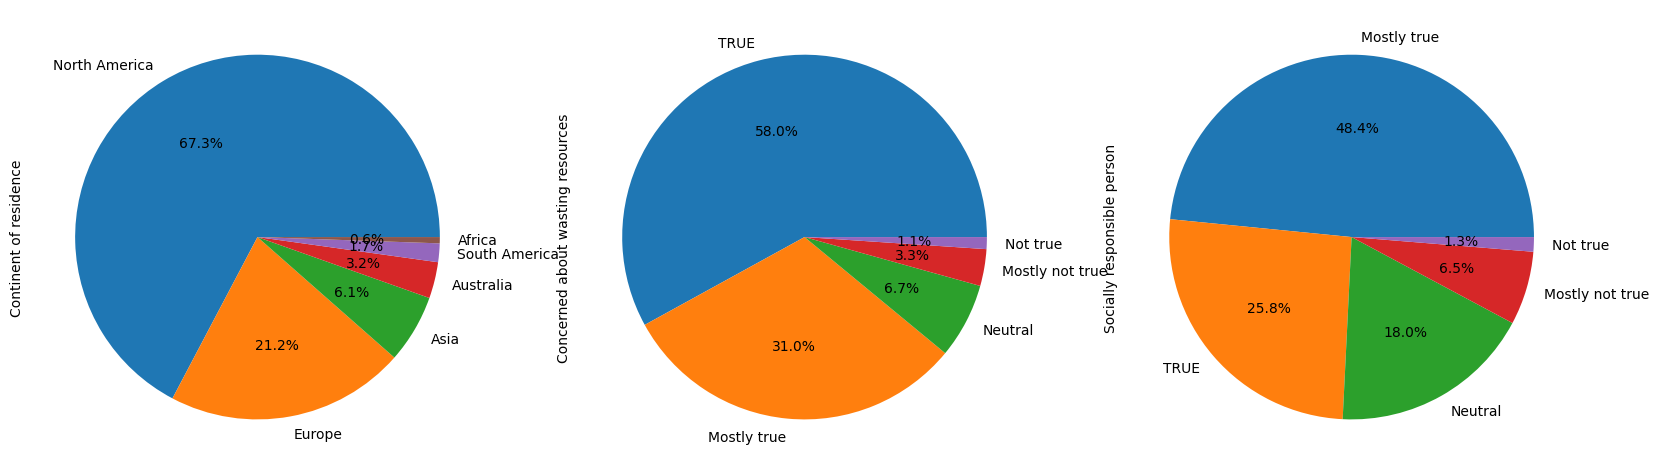

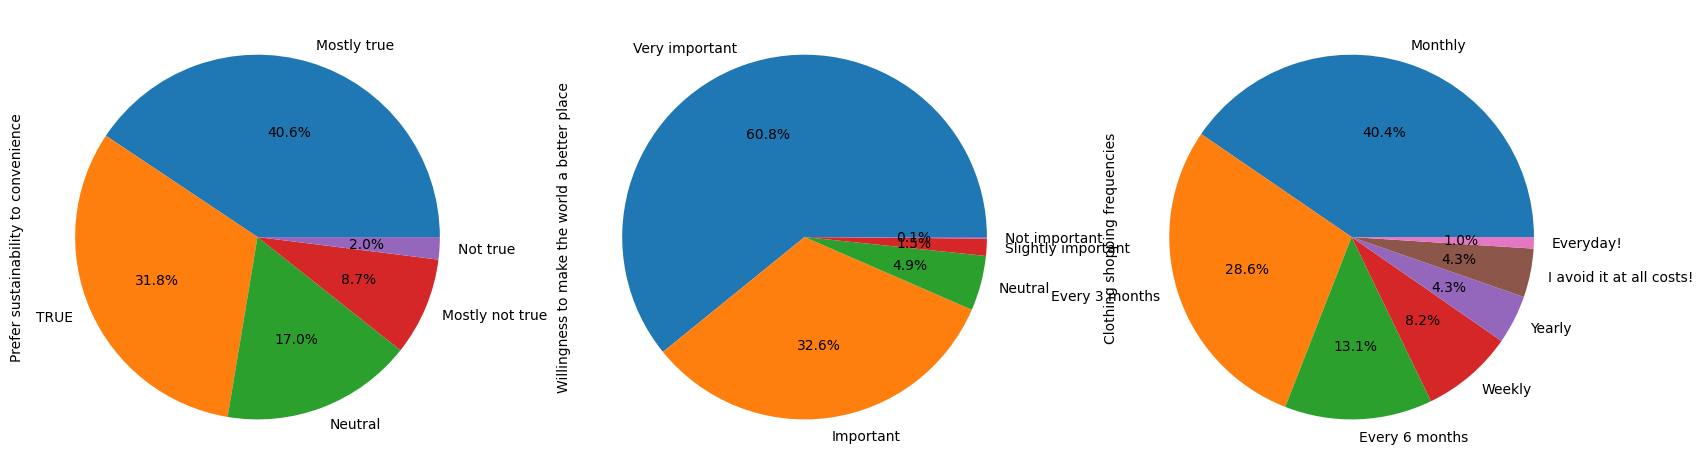

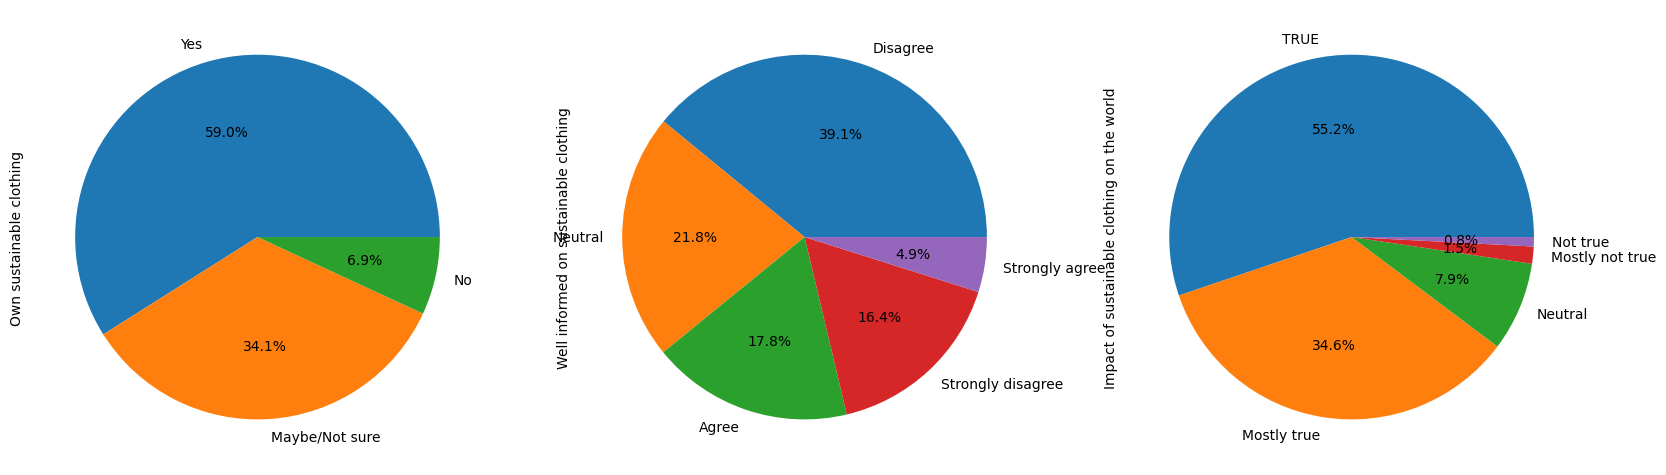

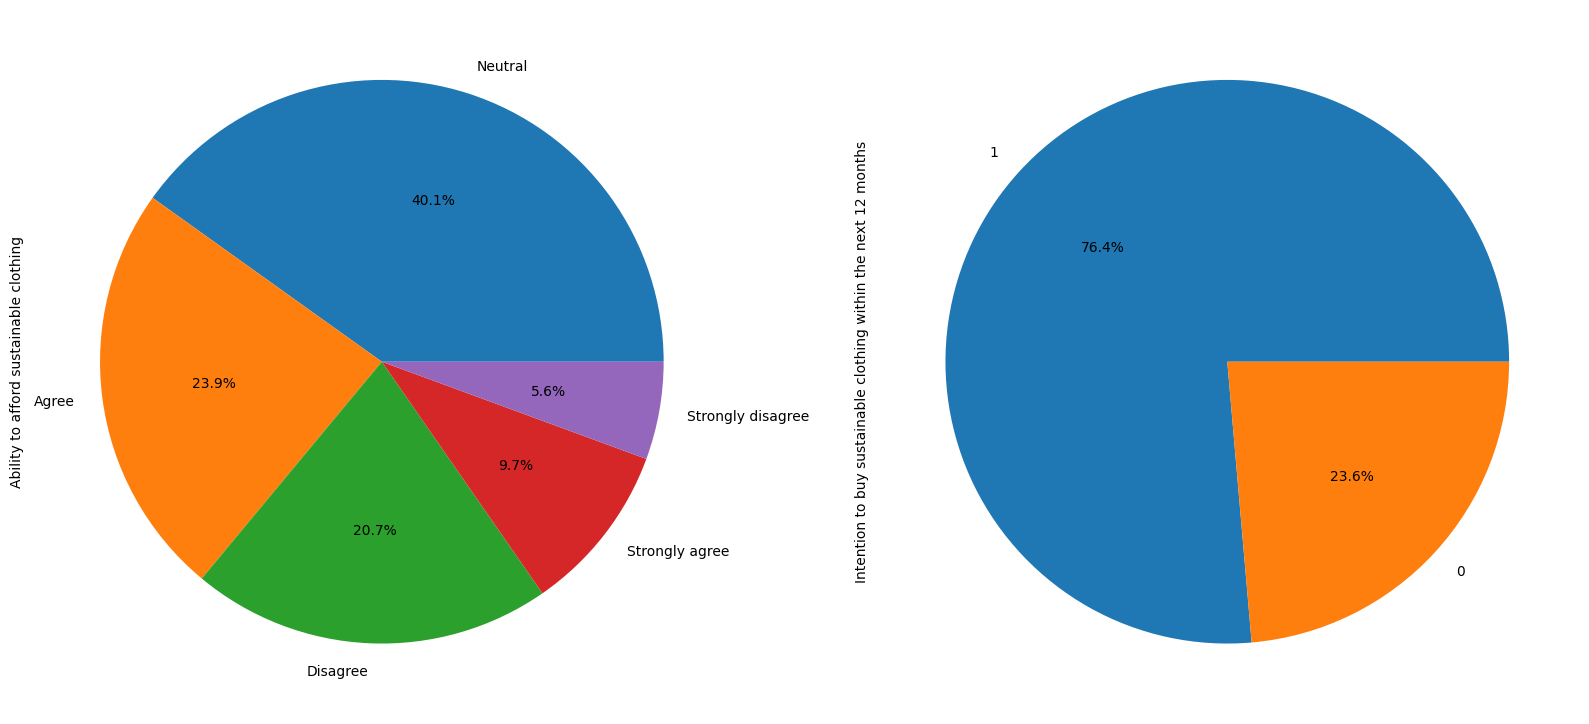

In [ ]:
Cdata=data.drop(columns=["ResponseId","Understanding of sustainability","Understanding of ethical fashion","Factors that influence my shopping decisions","Needs and desires"])
for k in range(0,15,3):
    columns = Cdata.columns.to_list()[k:k+3]
    fig, ax = plt.subplots(1, len(columns))
    for i, col in enumerate(Cdata[columns]):
        value_counts = Cdata[col].value_counts(dropna=False)
        value_counts.plot(kind="pie", autopct='%1.1f%%', ax=ax[i], figsize=(20,20))
    fig.show()

# Analyse preliminaire de la base de donnée

## Relation entre le genre et l'intention d'achat de la mode eco

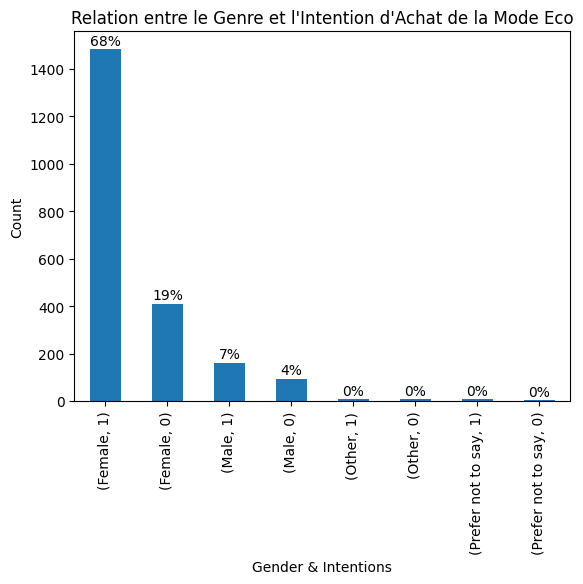

In [ ]:
ax=data[["Gender","Intention to buy sustainable clothing within the next 12 months"]].value_counts().plot(kind="bar")
total = sum(data[["Gender","Intention to buy sustainable clothing within the next 12 months"]].value_counts())
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height/total:.0%}', ha='center', va='bottom')

plt.title("Relation entre le Genre et l'Intention d'Achat de la Mode Eco")
plt.xlabel("Gender & Intentions")
plt.ylabel("Count")

plt.show()

## Relation entre l'age et l'intention d'achat de la mode eco

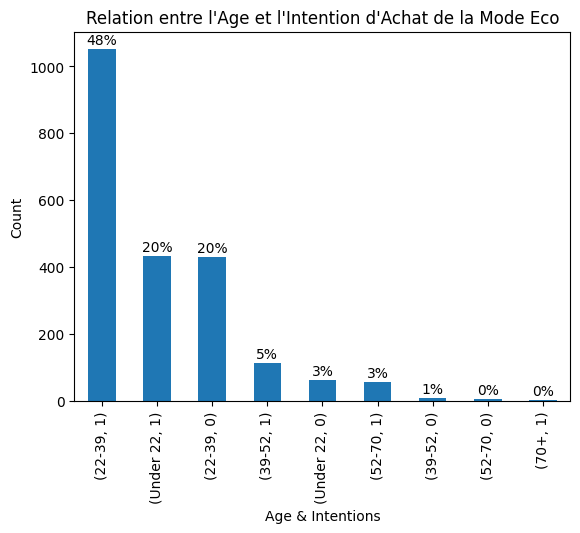

In [ ]:
ax=data[["Age","Intention to buy sustainable clothing within the next 12 months"]].value_counts().plot(kind="bar")
total = sum(data[["Age","Intention to buy sustainable clothing within the next 12 months"]].value_counts())
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height/total:.0%}', ha='center', va='bottom')

plt.title("Relation entre l'Age et l'Intention d'Achat de la Mode Eco")
plt.xlabel("Age & Intentions")
plt.ylabel("Count")

plt.show()

## Relation entre le continent de résidence et l'intention d'achat de la mode eco

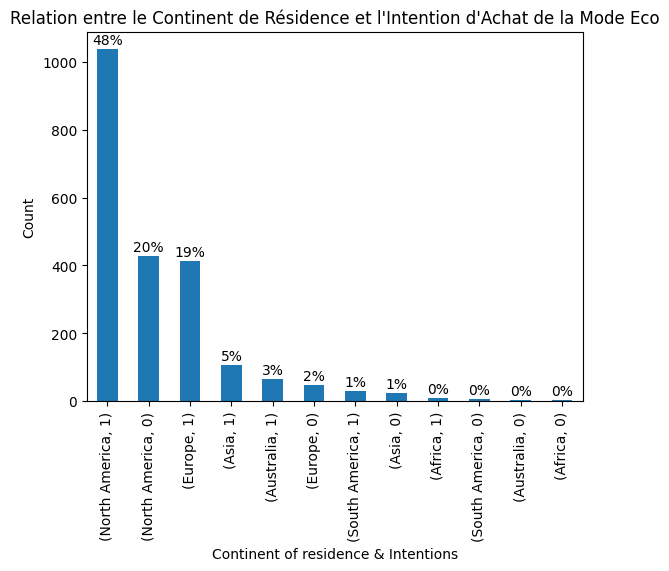

In [ ]:
ax=data[["Continent of residence","Intention to buy sustainable clothing within the next 12 months"]].value_counts().plot(kind="bar")
total = sum(data[["Continent of residence","Intention to buy sustainable clothing within the next 12 months"]].value_counts())
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height/total:.0%}', ha='center', va='bottom')

plt.title("Relation entre le Continent de Résidence et l'Intention d'Achat de la Mode Eco")
plt.xlabel("Continent of residence & Intentions")
plt.ylabel("Count")

plt.show()

# Analyste statistique

In [ ]:
datanum.describe().round(0)

,Age,Gender,Continent of residence,Concerned about wasting resources,Socially responsible person,Prefer sustainability to convenience,Willingness to make the world a better place,Clothing shopping frequencies,Own sustainable clothing,Well informed on sustainable clothing,Impact of sustainable clothing on the world,Ability to afford sustainable clothing,Intention to buy sustainable clothing within the next 12 months
count,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0,2176.0
mean,1.0,0.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0
std,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0
50%,1.0,0.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,1.0,3.0,2.0,1.0
75%,1.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,3.0,1.0
max,4.0,3.0,5.0,4.0,4.0,4.0,4.0,6.0,2.0,4.0,4.0,4.0,1.0


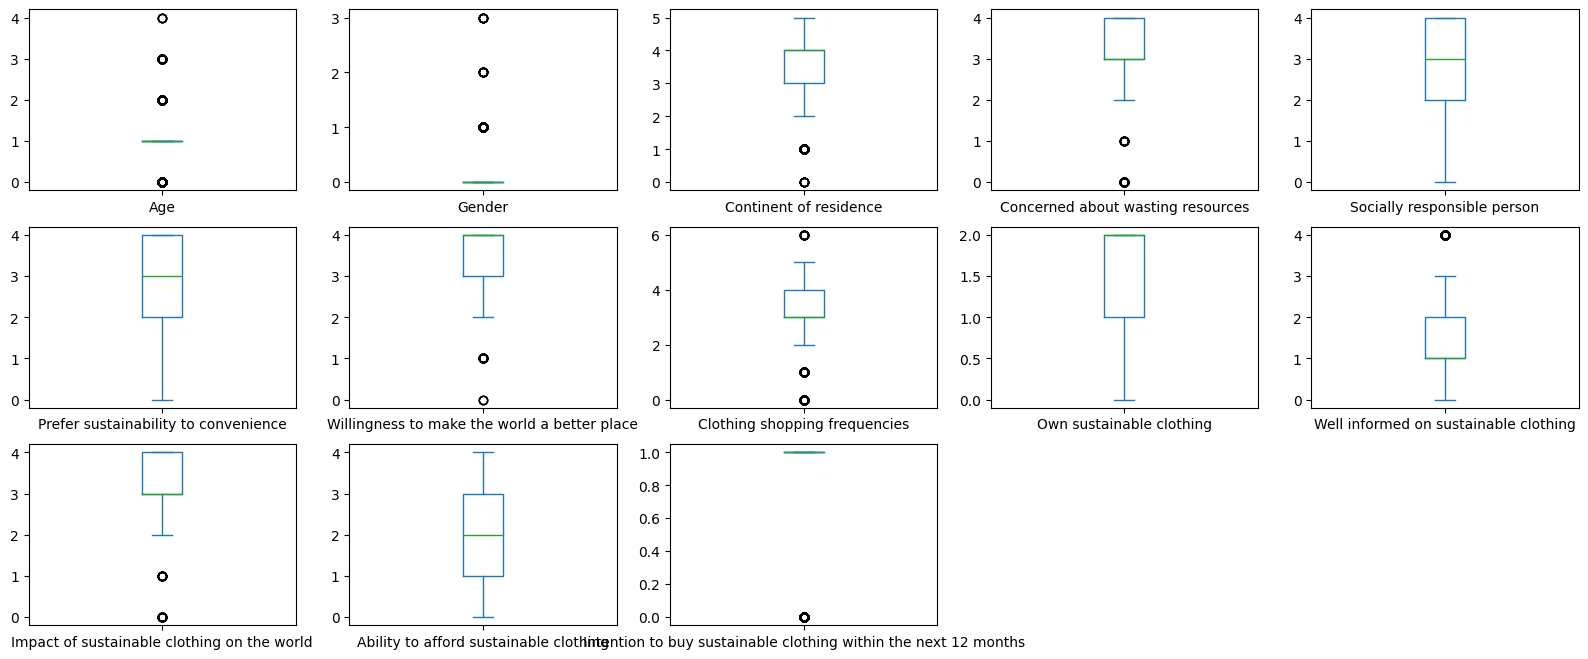

In [ ]:
datanum.plot(subplots=True,layout=(3,5), figsize=(20,8),kind="box");

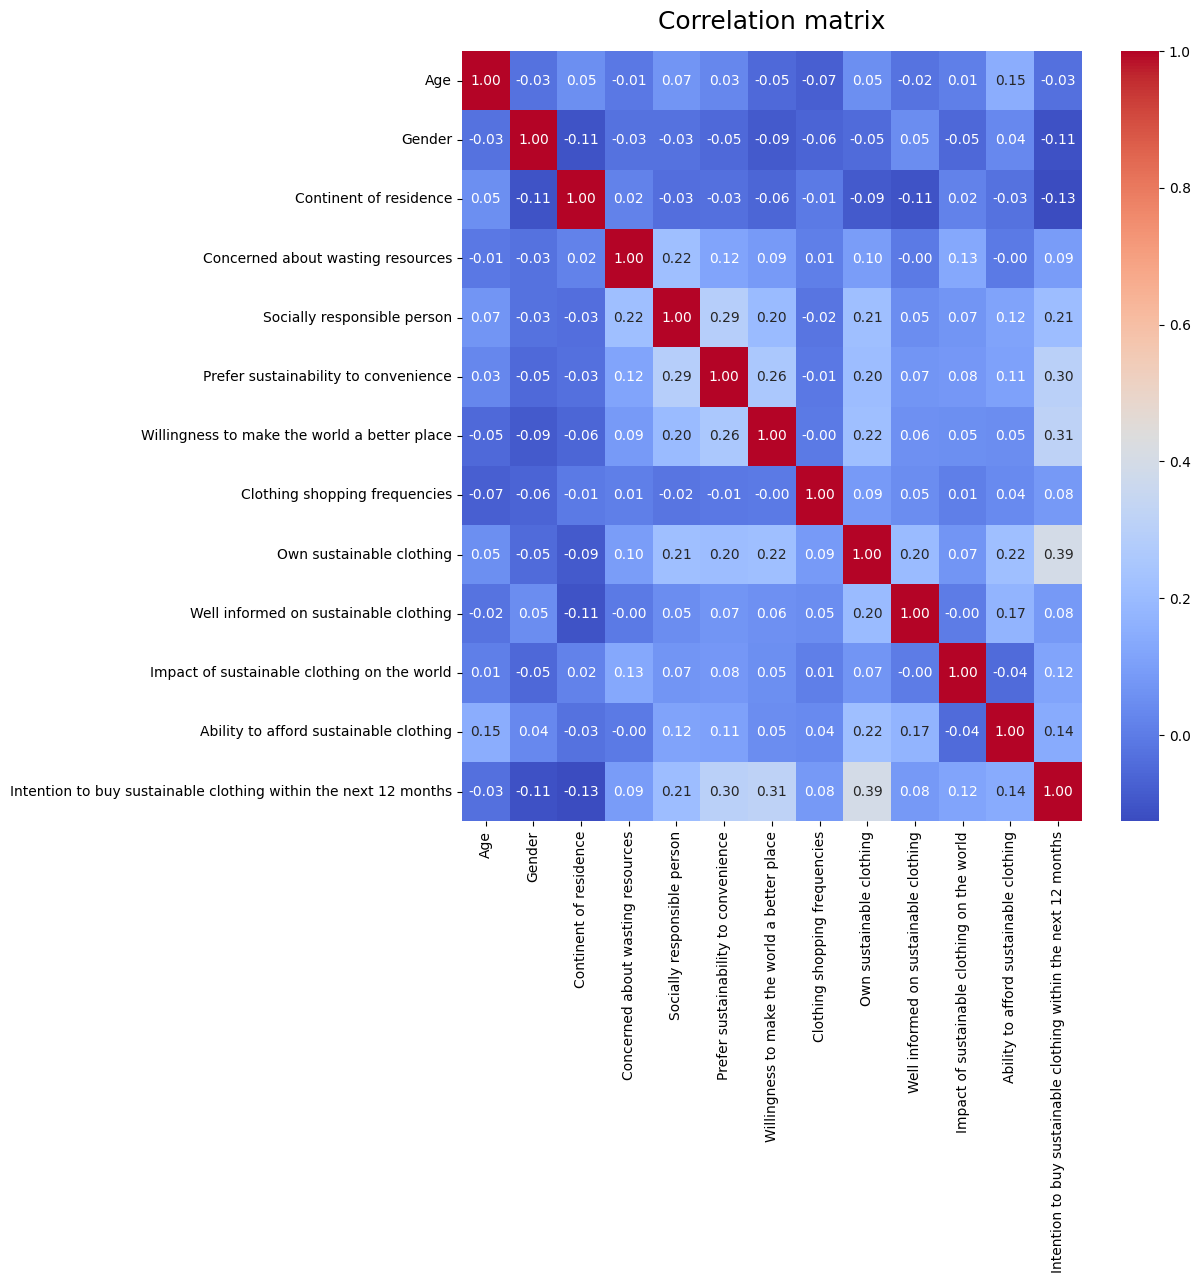

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap=sns.heatmap(datanum.corr(),annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
heatmap.set_title('Correlation matrix', fontdict={'fontsize':18}, pad=16);

# Topic Modelling

## Understanding  of sustainability

In [ ]:
Topic=pd.DataFrame()
np.random.seed(100)
# Nettoyer les données
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = tokenizer.tokenize(str(text).lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

Topic['Understanding of sustainability'] = data['Understanding of sustainability'].apply(lambda x: clean_text(x))

# Créer la matrice de document-termes
dictionary = corpora.Dictionary(Topic['Understanding of sustainability'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Topic['Understanding of sustainability']]

# Appliquer le modèle topic modeling
num_topics = 3
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=30)

# Afficher les sujets identifiés
Understanding_of_sustainability=[]
for topic in lda_model.show_topics():
    Understanding_of_sustainability.append(topic)

In [ ]:
print("UNDERSTANDING OF SUSTAINABILITY\n")
n=1
for i,c in Understanding_of_sustainability:
    print(f"Topic {n}:\n{c}\n")
    n+=1

UNDERSTANDING OF SUSTAINABILITY

Topic 1:
0.028*"environment" + 0.021*"product" + 0.019*"practice" + 0.017*"people" + 0.015*"fair" + 0.013*"harm" + 0.013*"production" + 0.012*"resource" + 0.012*"impact" + 0.011*"good"

Topic 2:
0.052*"resource" + 0.020*"nan" + 0.018*"natural" + 0.017*"impact" + 0.016*"sustainability" + 0.015*"future" + 0.014*"environmental" + 0.014*"generation" + 0.014*"environment" + 0.012*"sustainable"

Topic 3:
0.031*"environment" + 0.028*"something" + 0.025*"long" + 0.023*"way" + 0.021*"sustainability" + 0.021*"ability" + 0.018*"product" + 0.015*"impact" + 0.015*"people" + 0.014*"able"



## Understanding of ethical fashion

In [ ]:
np.random.seed(100)
# Nettoyer les données
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = tokenizer.tokenize(str(text).lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

Topic['Understanding of ethical fashion'] = data['Understanding of ethical fashion'].apply(lambda x: clean_text(x))

# Créer la matrice de document-termes
dictionary = corpora.Dictionary(Topic['Understanding of ethical fashion'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Topic['Understanding of ethical fashion']]

# Appliquer le modèle topic modeling
num_topics = 3
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=30)

# Afficher les sujets identifiés
Understanding_of_ethical_fashion=[]
for topic in lda_model.show_topics():
    Understanding_of_ethical_fashion.append(topic)

In [ ]:
print("UNDERSTANDING OF ETHICAL FASHION\n")
n=1
for i,c in Understanding_of_ethical_fashion:
    print(f"Topic {n}:\n{c}\n")
    n+=1

UNDERSTANDING OF ETHICAL FASHION

Topic 1:
0.051*"made" + 0.039*"clothing" + 0.039*"good" + 0.030*"fair" + 0.027*"material" + 0.021*"wage" + 0.020*"impact" + 0.019*"environmental" + 0.017*"worker" + 0.017*"quality"

Topic 2:
0.060*"environment" + 0.057*"made" + 0.041*"clothing" + 0.036*"clothes" + 0.025*"people" + 0.024*"impact" + 0.020*"last" + 0.018*"worker" + 0.018*"ethical" + 0.016*"harm"

Topic 3:
0.081*"clothing" + 0.062*"nan" + 0.048*"made" + 0.029*"friendly" + 0.029*"environmentally" + 0.022*"sustainable" + 0.021*"resource" + 0.019*"ethically" + 0.019*"material" + 0.016*"produced"



## Factors that influence my shopping decisions

In [ ]:
np.random.seed(100)
# Nettoyer les données
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = tokenizer.tokenize(str(text).lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

Topic['Factors that influence my shopping decisions'] = data['Factors that influence my shopping decisions'].apply(lambda x: clean_text(x))

# Créer la matrice de document-termes
dictionary = corpora.Dictionary(Topic['Factors that influence my shopping decisions'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Topic['Factors that influence my shopping decisions']]

# Appliquer le modèle topic modeling
num_topics = 3
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=30)

# Afficher les sujets identifiés
Factors=[]
for topic in lda_model.show_topics():
    Factors.append(topic)

In [ ]:
print("FACTORS INFLUENCING SHOPPING DECISIONS\n")
n=1
for i,c in Factors:
    print(f"Topic {n}:\n{c}\n")
    n+=1

FACTORS INFLUENCING SHOPPING DECISIONS

Topic 1:
0.110*"fit" + 0.104*"nan" + 0.054*"made" + 0.043*"whether" + 0.025*"clothing" + 0.019*"company" + 0.016*"need" + 0.015*"buying" + 0.015*"product" + 0.013*"ethically"

Topic 2:
0.107*"price" + 0.098*"quality" + 0.062*"need" + 0.048*"cost" + 0.043*"really" + 0.041*"style" + 0.032*"look" + 0.031*"item" + 0.027*"comfort" + 0.023*"sustainability"

Topic 3:
0.036*"buy" + 0.033*"good" + 0.026*"wear" + 0.025*"last" + 0.024*"long" + 0.024*"time" + 0.020*"look" + 0.019*"brand" + 0.019*"need" + 0.018*"something"



## Needs and desires

In [ ]:
np.random.seed(100)
# Nettoyer les données
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = tokenizer.tokenize(str(text).lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

Topic['Needs and desires'] = data['Needs and desires'].apply(lambda x: clean_text(x))

# Créer la matrice de document-termes
dictionary = corpora.Dictionary(Topic['Needs and desires'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Topic['Needs and desires']]

# Appliquer le modèle topic modeling
num_topics = 2
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=30)

# Afficher les sujets identifiés
Needs_desires=[]
for topic in lda_model.show_topics():
    Needs_desires.append(topic)

In [ ]:
print("NEEDS AND DESIRES\n")
n=1
for i,c in Needs_desires:
    print(f"Topic {n}:\n{c}\n")
    n+=1

NEEDS AND DESIRES

Topic 1:
0.043*"sustainable" + 0.031*"clothing" + 0.025*"clothes" + 0.023*"fit" + 0.018*"ethical" + 0.016*"brand" + 0.015*"affordable" + 0.013*"find" + 0.013*"store" + 0.012*"like"

Topic 2:
0.040*"made" + 0.037*"clothing" + 0.035*"quality" + 0.032*"good" + 0.030*"nan" + 0.020*"sustainable" + 0.019*"clothes" + 0.019*"affordable" + 0.017*"price" + 0.016*"product"



# Analyse PCA

In [ ]:
y=datanum["Intention to buy sustainable clothing within the next 12 months"]
x=datanum.drop(columns=["Intention to buy sustainable clothing within the next 12 months"])

In [ ]:
pca = PCA().fit(x)
pca_components = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(x.shape[1])],
                      columns=x.columns).T
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Age,-0.039891,0.044319,0.038187,-0.087015,-0.157102,-0.046907,0.026001,-0.096859,0.421868,0.854273,0.203193,0.037869
Gender,0.011780,0.007787,0.045079,-0.008604,0.005036,0.055728,0.000922,0.033807,0.066212,-0.071410,-0.000900,0.991935
Continent of residence,0.067949,0.055472,-0.146500,-0.048254,-0.203822,-0.935185,0.181081,0.016126,-0.111649,-0.027270,-0.046193,0.063301
Concerned about wasting resources,-0.167749,0.044155,-0.138360,-0.171964,0.187909,-0.179749,-0.805740,0.443578,0.071849,0.034148,0.035604,-0.001088
Socially responsible person,-0.577804,0.133303,-0.199327,-0.640208,0.263821,0.028711,0.332441,-0.045027,0.072221,-0.098112,0.030729,-0.004263
Prefer sustainability to convenience,-0.662889,0.116800,-0.205987,0.664399,-0.167597,-0.013226,0.046196,0.060036,0.157812,-0.064270,-0.000950,0.006423
Willingness to make the world a better place,-0.174889,0.018179,-0.035177,0.055269,0.042157,0.046668,-0.040699,-0.054658,-0.821979,0.304514,0.425880,0.080253
Clothing shopping frequencies,-0.024691,-0.899595,-0.427106,-0.008335,0.002548,0.012410,0.038461,0.004362,0.042054,0.030076,0.051601,0.025204
Own sustainable clothing,-0.179604,-0.080151,0.065499,-0.037372,-0.013869,0.030414,-0.077771,-0.086448,-0.283311,0.325177,-0.867866,0.042375
Well informed on sustainable clothing,-0.240189,-0.334215,0.731812,0.131077,0.442576,-0.256976,0.059132,0.019384,0.067643,0.001802,0.084494,-0.019479


In [ ]:
important_degres=pca.explained_variance_ratio_*100
important_degres

array([20.20540648, 15.16878418, 12.89455158, 10.00944658,  9.46512442,
        7.68839016,  6.57658266,  5.19288603,  4.37005907,  3.85161388,
        2.98480762,  1.59234734])

In [ ]:
(pca.explained_variance_ratio_*100).cumsum()

array([ 20.20540648,  35.37419066,  48.26874224,  58.27818882,
        67.74331324,  75.4317034 ,  82.00828606,  87.20117209,
        91.57123116,  95.42284504,  98.40765266, 100.        ])

In [ ]:
pkaiser=100/x.shape[1]
pkaiser

8.333333333333334

Le seuil de Kaiser determine le seuil à partir duquel les valeurs propres sont considérées comme significatives. D'après ce seuil, nous devons conserver les facteurs qui ont des valeurs propres supérieures à 8.33. C'est à dire PC1 à PC5
Cela nous donnera un degré d'importance cummulé de 67.74%. Cependant afin, d'avoir un degré d'importance cummulé de 82%, nous allons conserver PC1 à PC7

In [ ]:
data_projected=pca.transform(x)
data_projected=pd.DataFrame(data_projected,columns=['PC'+str(i+1) for i in range(x.shape[1])])
data_projected=data_projected[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]
data_projected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.627730,1.319148,0.426631,-0.869738,1.233073,-0.623730,0.397649
1,0.251675,2.703905,-0.488293,1.330358,1.095891,-0.477126,0.125538
2,-0.844629,3.200182,0.970778,0.570351,0.854872,-0.375448,1.075208
3,4.228128,-0.006176,-0.038515,0.375984,1.148915,-0.690597,-1.864084
4,-2.111363,-1.125884,0.745927,-0.207551,0.166991,0.006980,-0.857642
...,...,...,...,...,...,...,...
2171,-1.125217,1.720821,-0.338930,-0.115295,-0.155875,0.430572,-0.338940
2172,0.072281,-0.556460,-0.674641,1.229163,-0.982946,-0.296399,-0.080924
2173,-1.217878,0.497338,-0.345550,0.281499,0.366743,2.617330,0.013327
2174,-0.153422,-0.632721,-0.410156,0.076333,-0.101727,1.662577,-0.197540


# Modèle de classification: Kmeans
## Elbow method

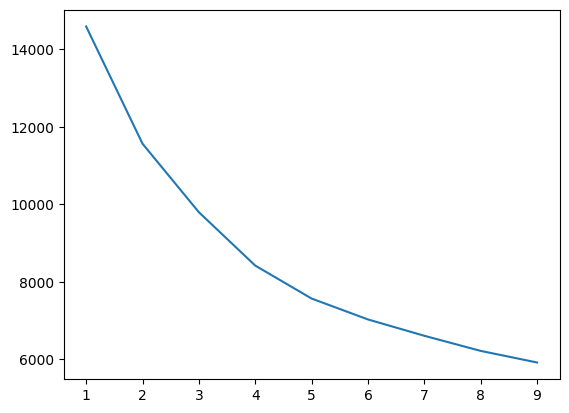

In [ ]:
elbow=[]
for i in range(1,10):
    model= KMeans(n_clusters=i, random_state=100)
    model.fit(data_projected)
    elbow.append(model.inertia_)
plt.plot(range(1,10),elbow)

## Kmeans

In [ ]:
kmeans=KMeans(n_clusters=2, random_state=100)
kmeans.fit_predict(data_projected)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

<Axes: xlabel='Prefer sustainability to convenience', ylabel='Socially responsible person'>

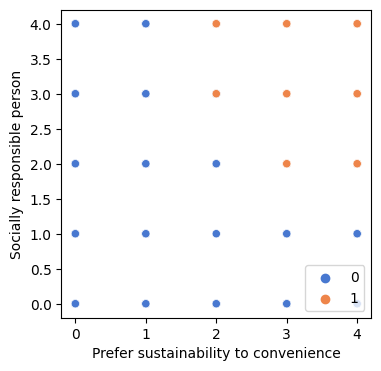

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
palette = sns.color_palette('muted', n_colors=len(set(kmeans.labels_)))
sns.scatterplot(data=x, x="Prefer sustainability to convenience",y="Socially responsible person", hue=kmeans.labels_,palette=palette, ax=ax)

In [ ]:
x["Grouping"]=kmeans.labels_
x

,Age,Gender,Continent of residence,Concerned about wasting resources,Socially responsible person,Prefer sustainability to convenience,Willingness to make the world a better place,Clothing shopping frequencies,Own sustainable clothing,Well informed on sustainable clothing,Impact of sustainable clothing on the world,Ability to afford sustainable clothing,Grouping
0,1,2,4,3,4,2,3,2,0,2,4,1,1
1,0,1,4,3,3,4,3,1,1,1,4,0,1
2,0,1,4,3,4,4,4,0,1,2,2,1,1
3,0,0,4,4,0,0,3,3,2,1,4,0,0
5,1,1,3,4,4,4,3,4,2,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2,0,3,4,4,4,4,2,0,1,3,2,1
2793,1,0,4,3,2,4,3,4,2,1,3,2,1
2794,0,0,1,3,4,4,4,3,1,1,3,2,1
2795,1,0,2,3,3,3,4,4,2,1,3,2,1


## CLASSE A

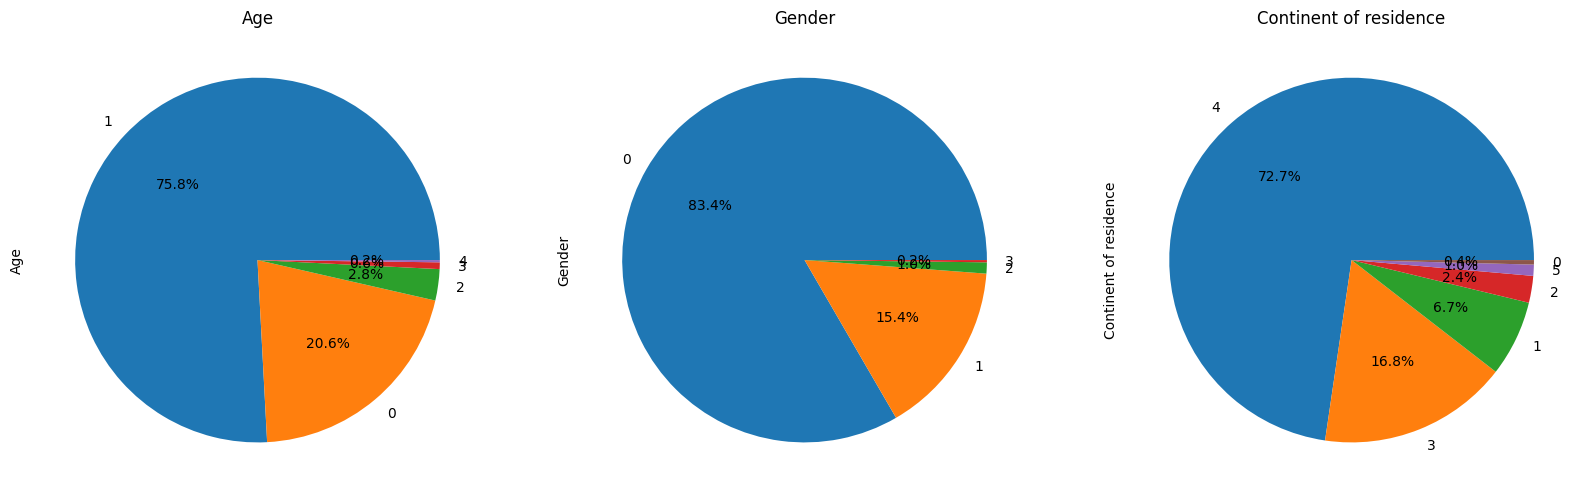

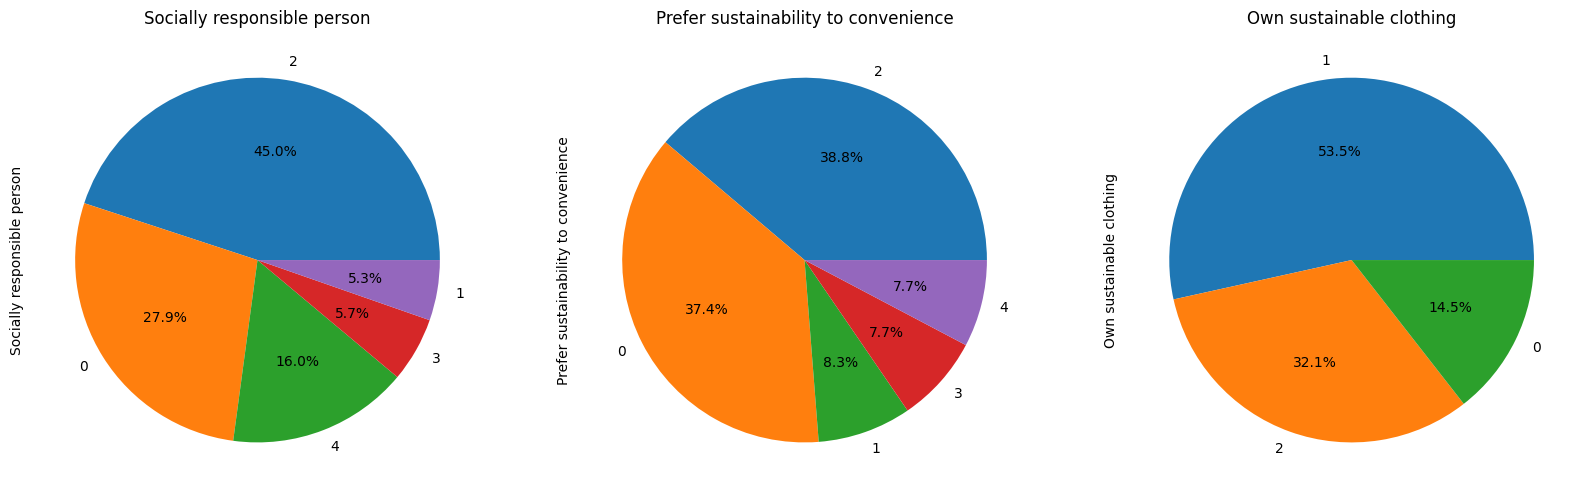

In [ ]:
classA=x[x["Grouping"]==0]
mainattributeA=classA[["Age","Gender","Continent of residence","Socially responsible person","Prefer sustainability to convenience","Own sustainable clothing"]]
for k in range(0,6,3):
  columns = mainattributeA.columns.to_list()[k:k+3]
  fig, ax = plt.subplots(1, len(columns))
  for i, col in enumerate(mainattributeA[columns]):
    mainattributeA[col].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[i], figsize=(20,20))
    ax[i].set_title(col)
    fig.show()

# CLASSE B

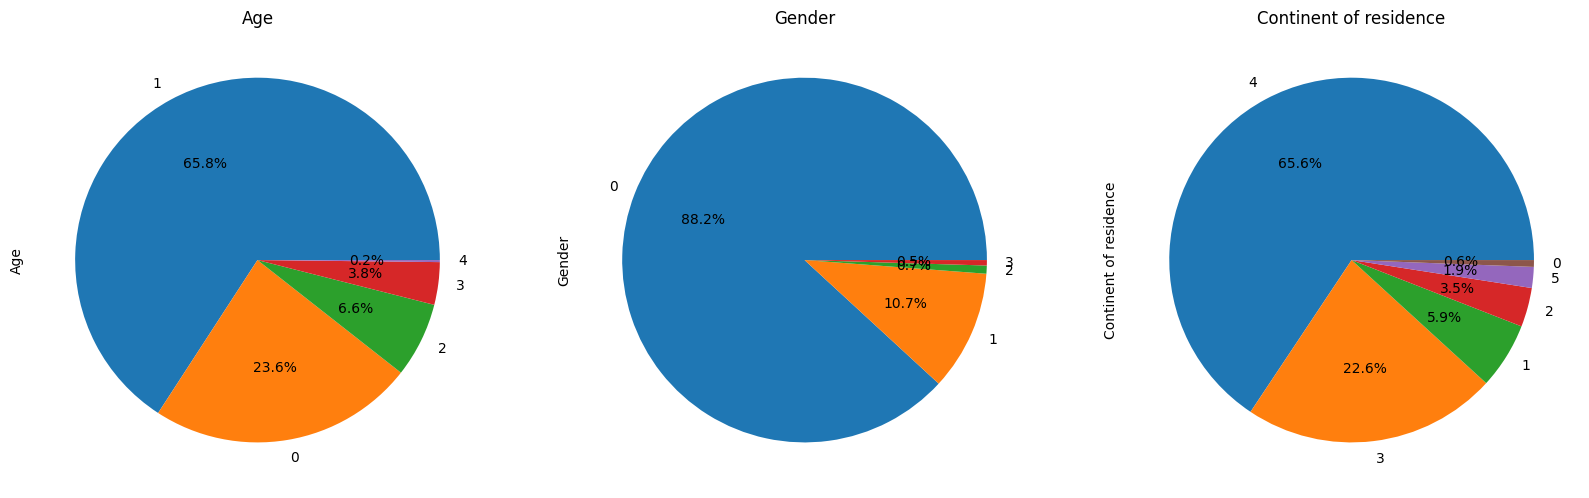

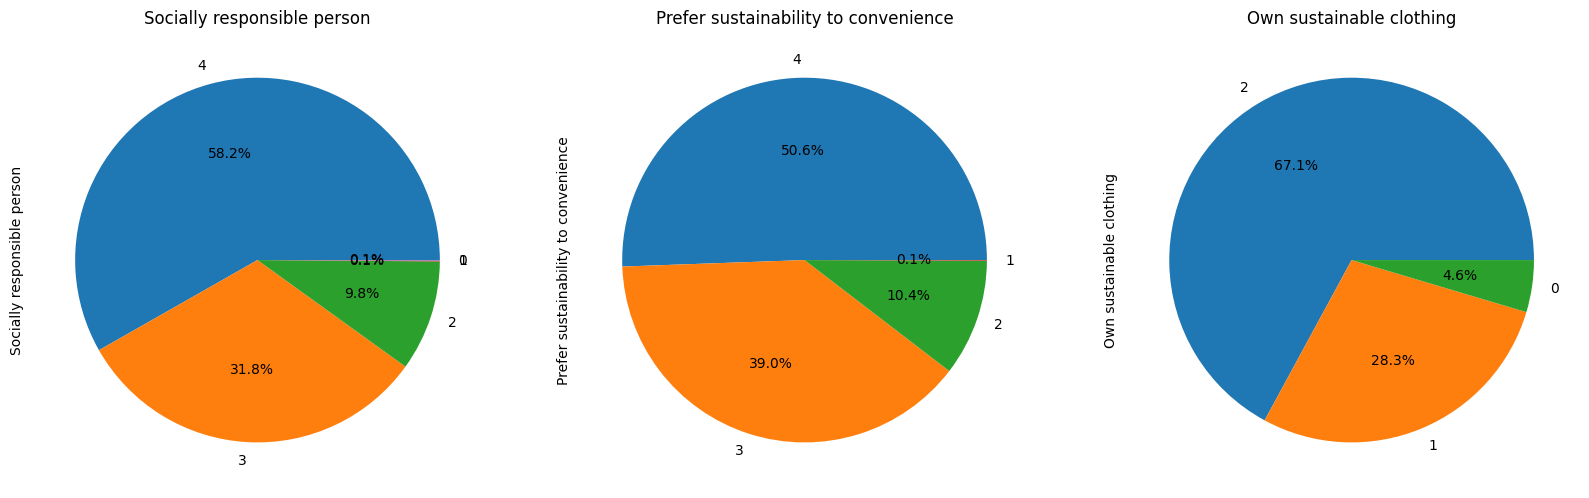

In [ ]:
classB=x[x["Grouping"]==1]
mainattributeB=classB[["Age","Gender","Continent of residence","Socially responsible person","Prefer sustainability to convenience","Own sustainable clothing"]]
for k in range(0,6,3):
  columns = mainattributeB.columns.to_list()[k:k+3]
  fig, ax = plt.subplots(1, len(columns))
  for i, col in enumerate(mainattributeB[columns]):
    mainattributeB[col].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[i], figsize=(20,20))
    ax[i].set_title(col)
    fig.show()

# Modèle de classification:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3, random_state=100)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
logreg.score(X_train,Y_train)

0.8233749179251477

In [ ]:
logreg.score(X_test,Y_test)

0.8101071975497703

In [ ]:
y_pred = logreg.predict(X_test)
resultat=pd.DataFrame()
resultat["réalité"]=Y_test
resultat["prediction"]= y_pred
resultat.head(10)

,réalité,prediction
363,1,1
1242,1,1
2579,1,1
808,0,1
679,1,1
1869,1,1
1541,0,0
101,0,1
2774,1,1
287,1,1


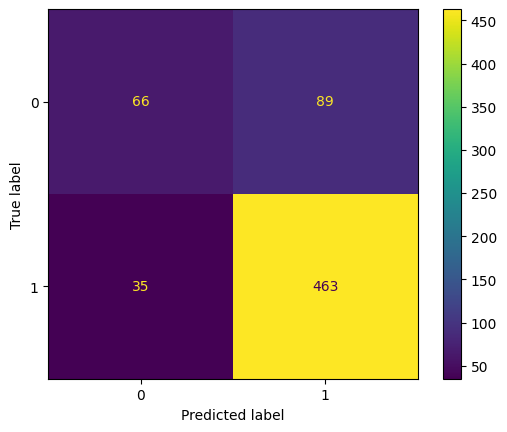

In [ ]:
cm=confusion_matrix(Y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()